<a href="https://colab.research.google.com/github/sabrinagues/People_analytics/blob/main/People_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Exploratória - People Analytics
* Esta análise possui o principal objetivo de entender padrões por trás dos funcionários inativos
* O dataset é composto por dados fictícios 

In [ ]:
import pandas as pd #análise de dados
import numpy as np #cálculos numéricos
import seaborn as sns #dataviz
import matplotlib.pyplot as plt #dataviz

##1 - Base Qualitativa

In [ ]:
base = pd.read_csv('https://raw.githubusercontent.com/sabrinagues/People_analytics/main/hr_dataset.csv')
display (base);

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,PercentSalaryHike,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,Sales Executive,4,Single,5993,11,3,0,6,4,0
1,49,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,Research Scientist,2,Married,5130,23,4,3,10,7,1
2,37,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,Laboratory Technician,3,Single,2090,15,3,3,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,Research Scientist,3,Married,2909,11,3,3,8,7,3
4,27,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,Laboratory Technician,2,Married,3468,12,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,Medical,2061,3,Male,Laboratory Technician,4,Married,2571,17,3,3,5,2,0
1466,39,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,Healthcare Representative,1,Married,9991,15,3,5,7,7,1
1467,27,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,Manufacturing Director,2,Married,6142,20,4,0,6,2,0
1468,49,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,Sales Executive,2,Married,5390,14,3,3,9,6,0


###1.0 - Excluir dados desnecessários



In [ ]:
base.drop(['EmployeeNumber'],axis=1,inplace=True)
base.shape

(1470, 18)

###1.1 - Filtros funcionários ativos ou inativos

In [ ]:
ativos = base.query('Attrition == "No"')
inativos = base.query('Attrition == "Yes"')

###1.2 - Describe funcionários ativos



In [ ]:
ativos.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,8.915653,2.771290,2.778589,6832.739659,15.231144,3.153285,2.832928,7.369019,4.484185,2.234388
std,8.888360,8.012633,1.071132,1.093277,4818.208001,3.639511,0.360408,1.293585,6.096298,3.649402,3.234762
min,18.000000,1.000000,1.000000,1.000000,1051.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,2.000000,2.000000,2.000000,3211.000000,12.000000,3.000000,2.000000,3.000000,2.000000,0.000000
50%,36.000000,7.000000,3.000000,3.000000,5204.000000,14.000000,3.000000,3.000000,6.000000,3.000000,1.000000
75%,43.000000,13.000000,4.000000,4.000000,8834.000000,18.000000,3.000000,3.000000,10.000000,7.000000,3.000000
max,60.000000,29.000000,4.000000,4.000000,19999.000000,25.000000,4.000000,6.000000,37.000000,18.000000,15.000000


### 1.3 Describe funcionários inativos

In [ ]:
inativos.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,10.632911,2.464135,2.468354,4787.092827,15.097046,3.156118,2.624473,5.130802,2.902954,1.945148
std,9.689350,8.452525,1.169791,1.118058,3640.210367,3.770294,0.363735,1.254784,5.949984,3.174827,3.153077
min,18.000000,1.000000,1.000000,1.000000,1009.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,1.000000,1.000000,2373.000000,12.000000,3.000000,2.000000,1.000000,0.000000,0.000000
50%,32.000000,9.000000,3.000000,3.000000,3202.000000,14.000000,3.000000,2.000000,3.000000,2.000000,1.000000
75%,39.000000,17.000000,4.000000,3.000000,5916.000000,17.000000,3.000000,3.000000,7.000000,4.000000,2.000000
max,58.000000,29.000000,4.000000,4.000000,19859.000000,25.000000,4.000000,6.000000,40.000000,15.000000,15.000000




Se comparados a funcionários ativos:
*   Funcionários inativos apresentam uma queda significativa nas médias de idade, salário mensal, anos na companhia e anos no cargo atual
*   É importante notar que a empresa está perdendo funcionários em média recentemente promovidos e com uma melhor performance





### 1.4 Histogramas

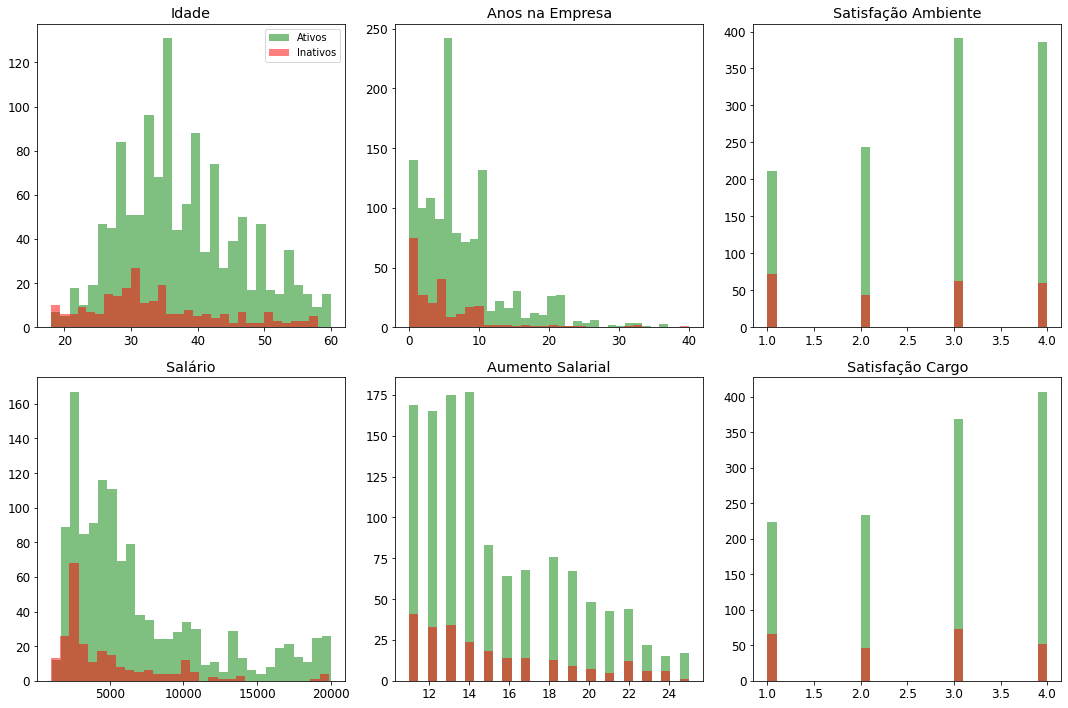

In [ ]:
n_bins = 30

fig, ((ax0, ax1,ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3,figsize=(15,10))

ax0.hist(ativos['Age'], alpha=0.5, label='Ativos',bins=30, color='green') 
ax0.hist(inativos['Age'], alpha=0.5, label='Inativos', bins=30, color='red')
ax0.legend(prop={'size': 10}) 
ax0.set_title('Idade')

ax1.hist(ativos['YearsAtCompany'], alpha=0.5, bins=30,color='green')
ax1.hist(inativos['YearsAtCompany'], alpha=0.5, bins=30, color='red') 
ax1.set_title('Anos na Empresa')

ax2.hist(ativos['EnvironmentSatisfaction'], alpha=0.5, bins=30,color='green') 
ax2.hist(inativos['EnvironmentSatisfaction'], alpha=0.5, bins=30, color='red') 
ax2.set_title('Satisfação Ambiente')

ax3.hist(ativos['MonthlyIncome'], alpha=0.5, bins=30,color='green') 
ax3.hist(inativos['MonthlyIncome'], alpha=0.5, bins=30, color='red')
ax3.set_title('Salário')

ax4.hist(ativos['PercentSalaryHike'], alpha=0.5,bins=30,color='green') 
ax4.hist(inativos['PercentSalaryHike'], alpha=0.5,bins=30, color='red')  
ax4.set_title('Aumento Salarial')

ax5.hist(ativos['JobSatisfaction'], alpha=0.5, bins=30,color='green') 
ax5.hist(inativos['JobSatisfaction'], alpha=0.5, bins=30, color='red') 
ax5.set_title('Satisfação Cargo')

fig.tight_layout()
plt.show()

Existe a seguinte concentração em funcionários inativos:
*   Funcionários mais jovens
*   Maior insatisfação com a empresa e com o cargo
*   Salário mais abaixo
*   Menos tempo de companhia



###1.5 - Boxplot salário por cargo

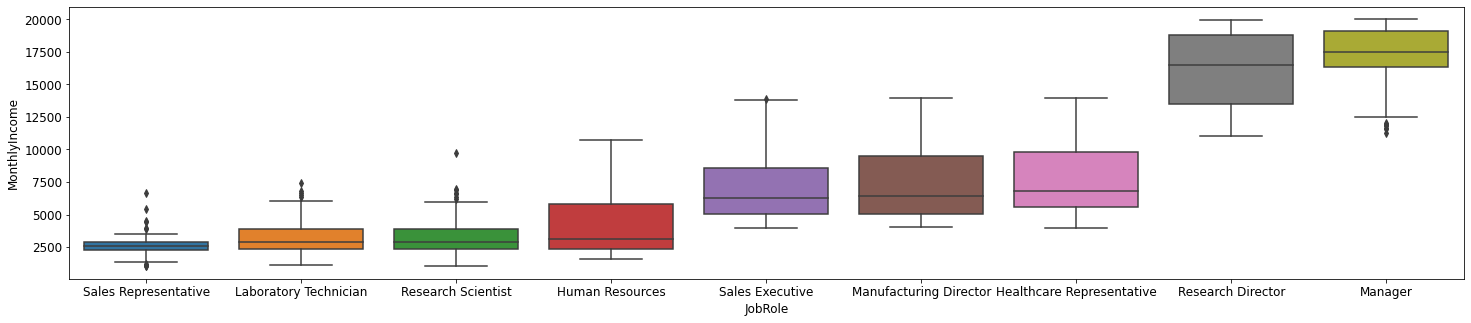

In [ ]:
plt.figure(figsize=(25,5))
media = pd.DataFrame (base.groupby(["JobRole"]).mean()['MonthlyIncome'].round(1).to_frame('mean'))
my_order= media[['mean']].sort_values(by=['mean'])
df = my_order.index
sns.boxplot(x = 'JobRole',y = 'MonthlyIncome',data = base,order = df)
plt.show()
#display (df);



*   Gerentes e Diretores de Pesquisa possuem a maior média salarial
*   Representantes de Vendas e Técnicos de Laboratório possuem a menor média salarial - o primero possui menos variação no salário.



###1.6 - Satisfação com o ambiente (Funcionários Inativos)

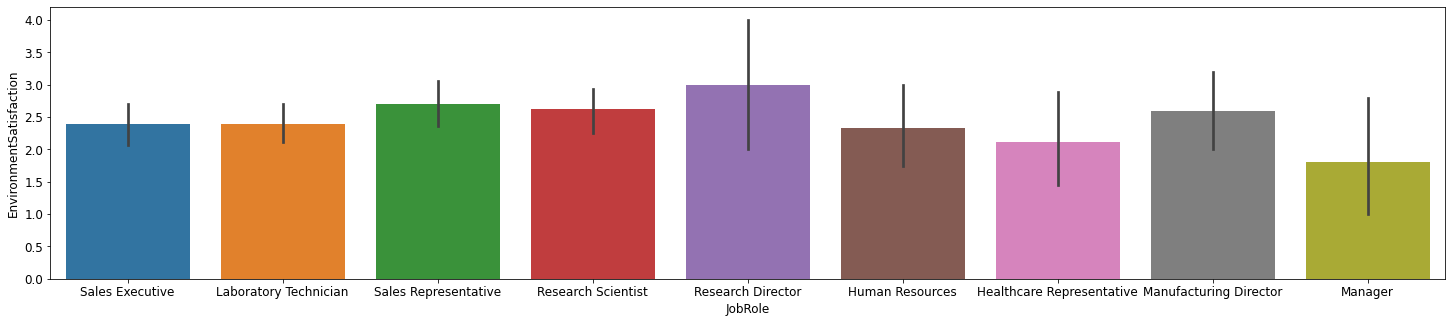

In [ ]:
filtro= base[(base['Attrition'] == 'Yes')]
plt.figure(figsize=(25,5))
sns.barplot(x = 'JobRole', y = 'EnvironmentSatisfaction',data = filtro);

Os cargos de Gerente e Representante de Healthcare apresentam as menores médias de satisfação com o ambiente de trabalho

##2 - Base Quantitativa

In [ ]:
base_qnt = pd.read_csv('https://raw.githubusercontent.com/sabrinagues/People_analytics/main/hr_dataset_qnt.csv')
base_qnt.drop(['EmployeeNumber'],axis=1,inplace=True)
display (base_qnt);

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,PercentSalaryHike,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,MonthlyIncome
0,1,41,2,3,1,3,2,2,5,4,1,11,3,0,6,4,0,5993
1,2,49,3,1,8,3,3,1,3,2,3,23,4,3,10,7,1,5130
2,1,37,2,1,2,2,4,1,2,3,1,15,3,3,0,0,0,2090
3,2,33,3,1,3,3,4,2,3,3,3,11,3,3,8,7,3,2909
4,2,27,2,1,2,4,1,1,2,2,3,12,3,3,2,2,2,3468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,36,3,1,23,4,3,1,2,4,3,17,3,3,5,2,0,2571
1466,2,39,2,1,6,4,4,1,7,1,3,15,3,5,7,7,1,9991
1467,2,27,2,1,4,3,2,1,6,2,3,20,4,0,6,2,0,6142
1468,2,49,3,3,2,4,4,1,5,2,3,14,3,3,9,6,0,5390


Variáveis qualitativas convertidas em quantitativas para possibilitar análises de correlação

###2.1 - Correlação todas variáveis

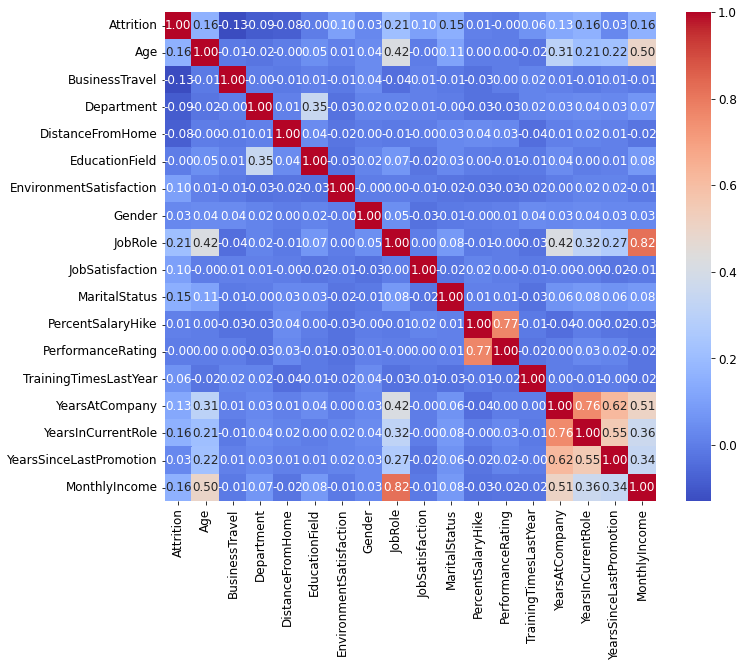

In [ ]:
corr = base_qnt.corr().round(2)
plt.figure(figsize=(11, 9))
sns.heatmap(corr, annot = True,fmt = '.2f', cmap='coolwarm')
plt.rcParams.update({'font.size': 12})
plt.show()


Correlações Fortes ou Moderadas:
*   Salário mensal e cargo
*   Avaliação de performance e aumento salarial
*   Salário mensal e anos na companhia
*   Salário mensal e idade
*   Idade e cargo

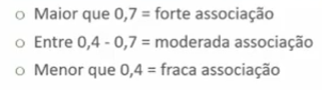

Observações
*   Não parece existir uma correlação da perfomance com a quantidade de treinamentos. Estão investindo em treinamentos direcionados? Os fornecedores são bem avaliados?
*   Não foram encontradas fortes correlações que justifiquem o nível de satisfação dos funcionários. Entender mais a fundo (pesquisas de clima, pulses, avaliações 360)





###2.2 - Correlação Aumento Salarial X Avaliação Performance

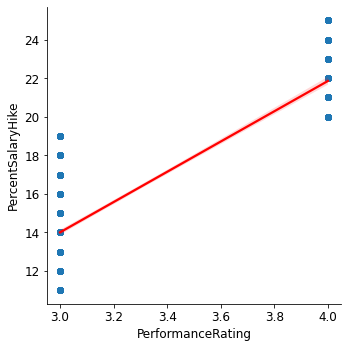

In [ ]:
sns.lmplot(x='PerformanceRating', y='PercentSalaryHike', line_kws={'color':'red'}, data= base_qnt);

Existe uma relação direta da avaliação de performance do funcionário com seu aumento salarial (últimos 2 anos)

*   Nota 3 = Aumento salarial de até 19%
*   Nota 4 = Aumento salarial acima de 20% 



###2.3 - Correlação Cargo X Salário Mensal

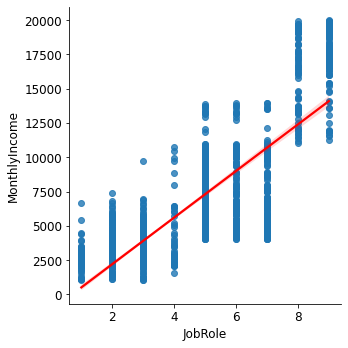

In [ ]:
sns.lmplot(x='JobRole', y='MonthlyIncome', line_kws={'color':'red'}, data= base_qnt);

Existe uma forte correlação entre o cargo ocupado e o salário mensal. Abaixo veremos que isso pode ter impacto no status do funcionário (ativo ou inativo)

###2.4 - Análise percentual inativos por cargo

In [ ]:
filtro= base[(base['Attrition'] == 'Yes')]
inativos2 = pd.DataFrame (filtro.groupby(["JobRole"]).size().to_frame('Inativos'))
total = pd.DataFrame (base.groupby(["JobRole"]).size().to_frame('Total'))
media_salario = base.groupby(["JobRole"]).mean()['MonthlyIncome'].round(1)
media_jobsatis = filtro.groupby(["JobRole"]).mean()['JobSatisfaction'].round(2)
media_envsatis = filtro.groupby(["JobRole"]).mean()['EnvironmentSatisfaction'].round(2)
merge = pd.concat([inativos2,total,media_salario,media_jobsatis,media_envsatis], axis=1, join = 'inner')
merge['Percentual_Inativos'] = merge['Inativos']/merge['Total']*100
final= merge[['Total','Percentual_Inativos','MonthlyIncome','JobSatisfaction','EnvironmentSatisfaction']].sort_values(by=['Percentual_Inativos'])
display(final);

,Total,Percentual_Inativos,MonthlyIncome,JobSatisfaction,EnvironmentSatisfaction
JobRole,,,,,
Research Director,80,2.500000,16033.6,2.50,3.00
Manager,102,4.901961,17181.7,2.40,1.80
Healthcare Representative,131,6.870229,7528.8,2.78,2.11
Manufacturing Director,145,6.896552,7295.1,2.60,2.60
Research Scientist,292,16.095890,3240.0,2.43,2.62
Sales Executive,326,17.484663,6924.3,2.53,2.39
Human Resources,52,23.076923,4235.8,2.17,2.33
Laboratory Technician,259,23.938224,3237.2,2.44,2.39
Sales Representative,83,39.759036,2626.0,2.48,2.70


É possível notar que o percentual de inativos por cargo possui uma correlação inversamente proporcional com seu salário mensal (quanto menor o salário médio mensal, maior a quantidade de inativos por cargo).
Isso também pode se dar por uma maior rotatividade de cargos mais abaixo na hierarquia.

A satisfação, tanto com o cargo quanto com o ambiente, não parece ter correlação com a taxa de desligamento - isso fica claro nos cargos de Gerente e Representante de Healthcare.

Cabe ressaltar que a base não informa o tipo de demissão (voluntária, justa causa, etc)

### 2.5 - Regressão linear salário mensal

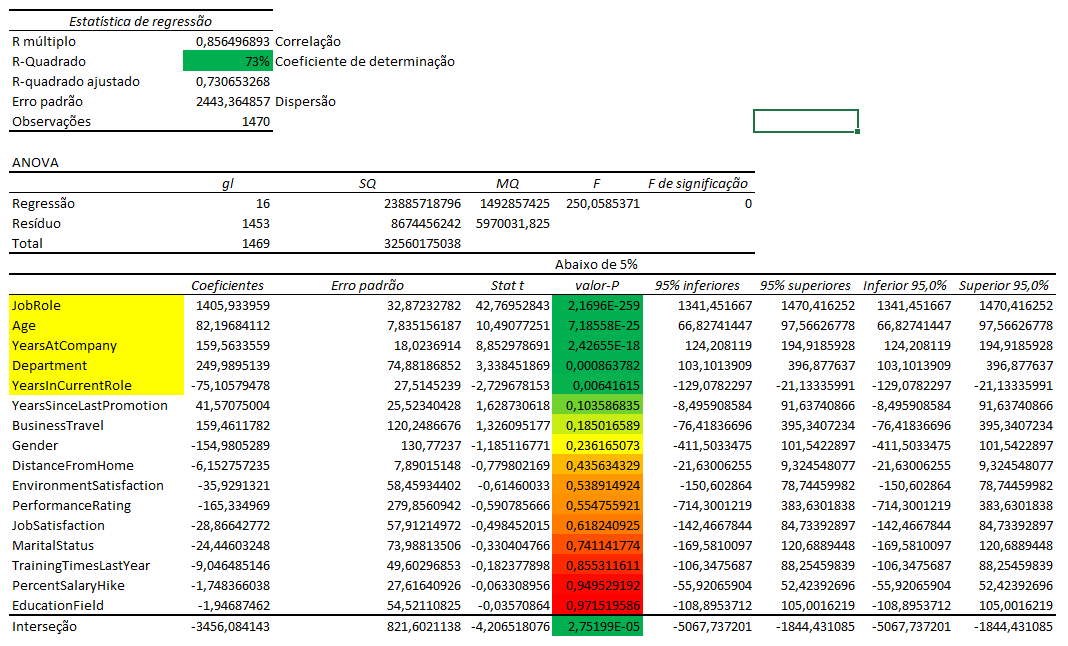

As variáveis com maior significância no aumento ou diminuição do salário são:
*   Cargo
*   Idade
*   Tempo de Companhia
*   Departamento
*   Tempo no Cargo

### 2.6 - Key Influencers Power BI
Foi utilizada a inteligência artificial do Power BI (Key Influencers) para analisar as variáveis que mais influenciam no desligamento dos funcionários

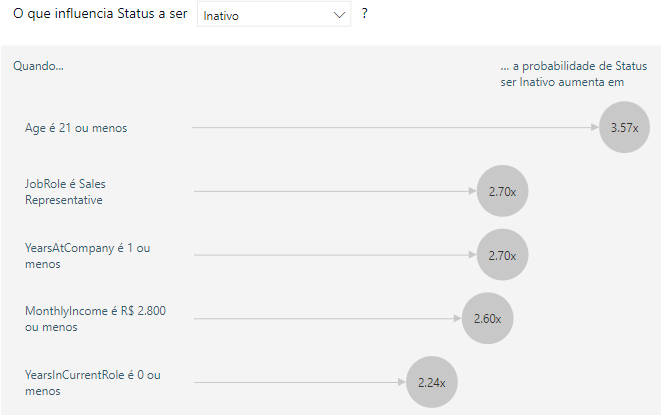

Algumas sugestões para reduzir o desligamento voluntário influenciado pelas variáveis acima:

*   Programas de incentivo para funcionários jovens (bolsas de estudos, cursos de línguas, parcerias descontos)
*   Programas de comissão atrativos para representante de vendas. Verificar se suas metas são justas
*   Promover bonificações/premiações por tempo de casa ou no cargo
*   Pesquisas de mercado para entender médias salariais
*   Avaliações 360 para avaliar a relação entre equipes, pares e líderes
